## Strategy Description
(Note: This is a sample strategy and is only for educational purpose)

### Technical Indicators Required -> 5 EMA & 11 EMA

Rules:-  
1. When 5 EMA (faster EMA) crosses from below, and close > 5EMA -> Buy  
2. When 5 EMA (faster EMA) crosses from above, and close < 5EMA -> Sell    

Universe:-  
Nifty Futures - 15 minute timeframe

<!-- ![Screenshot 2024-03-25 211014.png](<attachment:Screenshot 2024-03-25 211014.png>) -->
Screenshot here
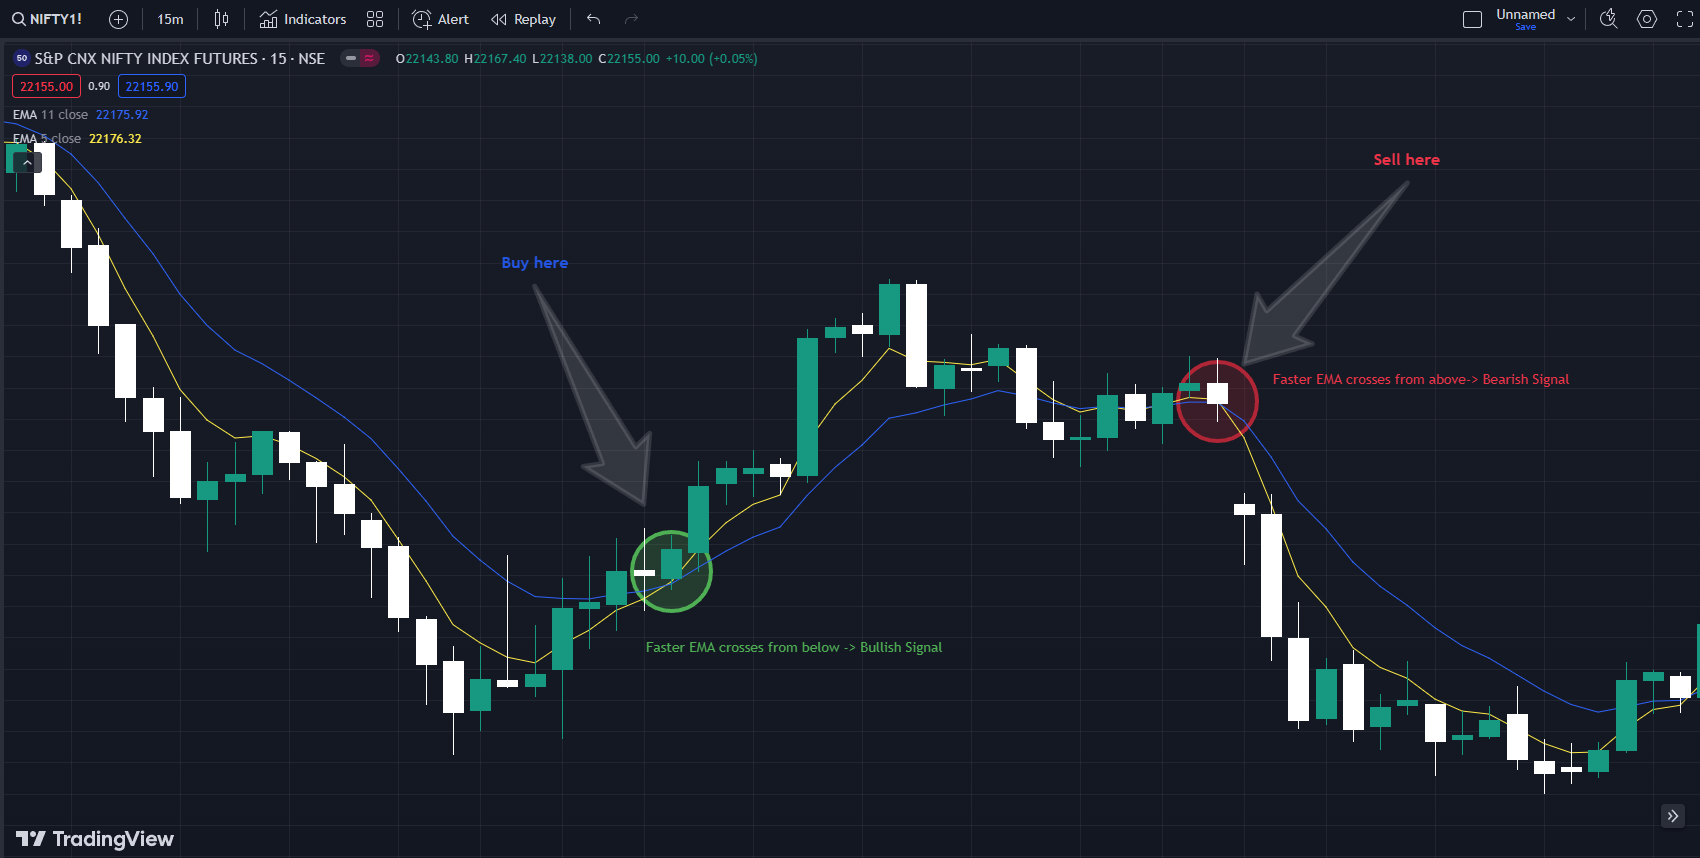

-----

### Importing Essential Libraries

In [8]:
# Import libraries
import numpy as np
import pandas as pd
import pandas_ta as ta

### Import Datasets

In [9]:
# Import Datasets
df = pd.read_csv(r"C:\Indian Data\Futures\NIFTY-FUT1.csv")
df.head()

,datetime,open,high,low,close,volume,symbol
0,01-01-2019 09:15,10909.95,10929.90,10908.45,10910.20,33750,31-01-2019
1,01-01-2019 09:16,10911.00,10916.80,10908.05,10912.10,15300,31-01-2019
2,01-01-2019 09:17,10911.35,10911.35,10910.95,10910.95,4275,31-01-2019
3,01-01-2019 09:18,10898.35,10898.35,10893.10,10897.00,3525,31-01-2019
4,01-01-2019 09:19,10896.00,10896.00,10870.45,10872.15,123525,31-01-2019


### Data Processing

In [10]:
df.head(3)

,datetime,open,high,low,close,volume,symbol
0,01-01-2019 09:15,10909.95,10929.90,10908.45,10910.20,33750,31-01-2019
1,01-01-2019 09:16,10911.00,10916.80,10908.05,10912.10,15300,31-01-2019
2,01-01-2019 09:17,10911.35,10911.35,10910.95,10910.95,4275,31-01-2019


In [11]:
# Timeframe Change from 1 minute to 15 minutes
df.drop('symbol', axis = 1, inplace = True)
agg = {'open':'first',
       'high':'max',
       'low':'min',
       'close':'last',
       'volume':'sum'
       }
df['datetime'] = pd.to_datetime(df['datetime'], format = '%d-%m-%Y %H:%M')
df = df.set_index(df['datetime'])
df = df.between_time('09:15','15:29')
df =df.resample('15min', origin = 'start').agg(agg).dropna()

In [12]:
# applying EMA to the dataframe
df['5ema'] = ta.ema(df['close'], length = 5)
df['11ema'] = ta.ema(df['close'], length = 11)

In [ ]:
ta.supertrend()

In [13]:
df.head(6)

,open,high,low,close,volume,5ema,11ema
datetime,,,,,,,
2019-01-01 09:15:00,10909.95,10929.90,10864.00,10883.00,597525,NaN,NaN
2019-01-01 09:30:00,10882.00,10883.00,10868.00,10878.00,221700,NaN,NaN
2019-01-01 09:45:00,10878.00,10882.90,10853.00,10853.65,375675,NaN,NaN
2019-01-01 10:00:00,10854.65,10859.00,10843.20,10857.35,379800,NaN,NaN
2019-01-01 10:15:00,10857.10,10865.65,10851.85,10865.05,147375,10867.41,NaN
2019-01-01 10:30:00,10866.00,10869.70,10856.05,10863.00,109350,10865.94,NaN


### Backtesting

In [14]:
# Starting backtesting

